<a href="https://colab.research.google.com/github/pavankalyan066/ML-Notebooks/blob/main/uHack_Sentiments_2_0_Decode_Code_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from skmultilearn.problem_transform import LabelPowerset
import re
nltk.download('stopwords')
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

#uncomment to install
#pip install scikit-multilearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/submission.csv')

In [4]:
print(train.shape, test.shape)

(6136, 14) (2631, 14)


In [5]:
train.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [6]:
train.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [7]:
train.describe()

,Id,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000
mean,3067.500000,0.044654,0.029172,0.105932,0.113266,0.051010,0.413625,0.124185,0.025261,0.139179,0.354791,0.200293,0.777379
std,1771.454958,0.206561,0.168302,0.307776,0.316943,0.220037,0.492523,0.329820,0.156929,0.346161,0.478489,0.400252,0.416040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1533.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3067.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4601.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6135.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [5]:
target = ['Components', 'Delivery and Customer Support', 'Design and Aesthetics', 'Dimensions',
       'Features', 'Functionality', 'Installation', 'Material', 'Price',
       'Quality', 'Usability', 'Polarity']

In [13]:
labels = train.iloc[:,2:].sum().values

In [14]:
labels

array([ 274,  179,  650,  695,  313, 2538,  762,  155,  854, 2177, 1229,
       4770])

**EDA**

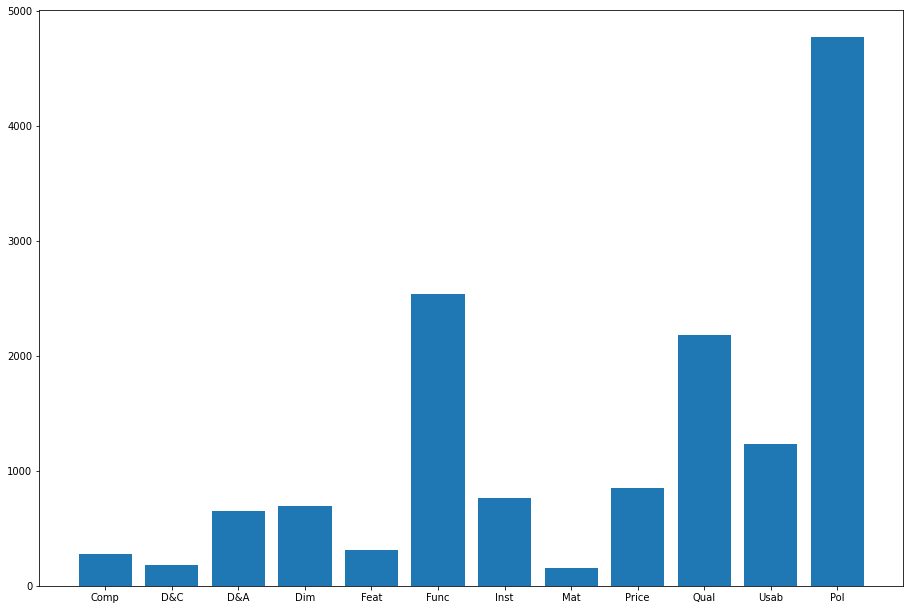

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
cat = ['Comp', 'D&C', 'D&A', 'Dim','Feat', 
         'Func', 'Inst', 'Mat', 'Price','Qual', 
         'Usab', 'Pol']
value = [274, 179, 650, 695, 313, 2538, 762, 155, 854, 2177, 1229, 4770]
ax.bar(cat,value)
plt.show()

In [16]:
rowSums = train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

In [17]:
multiLabel_counts

3    1892
1     774
4     558
5      30
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


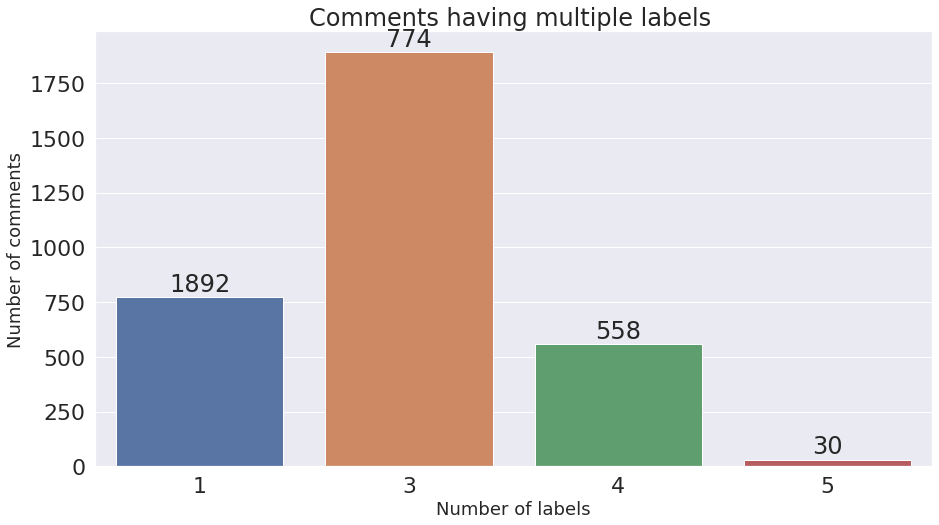

In [18]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

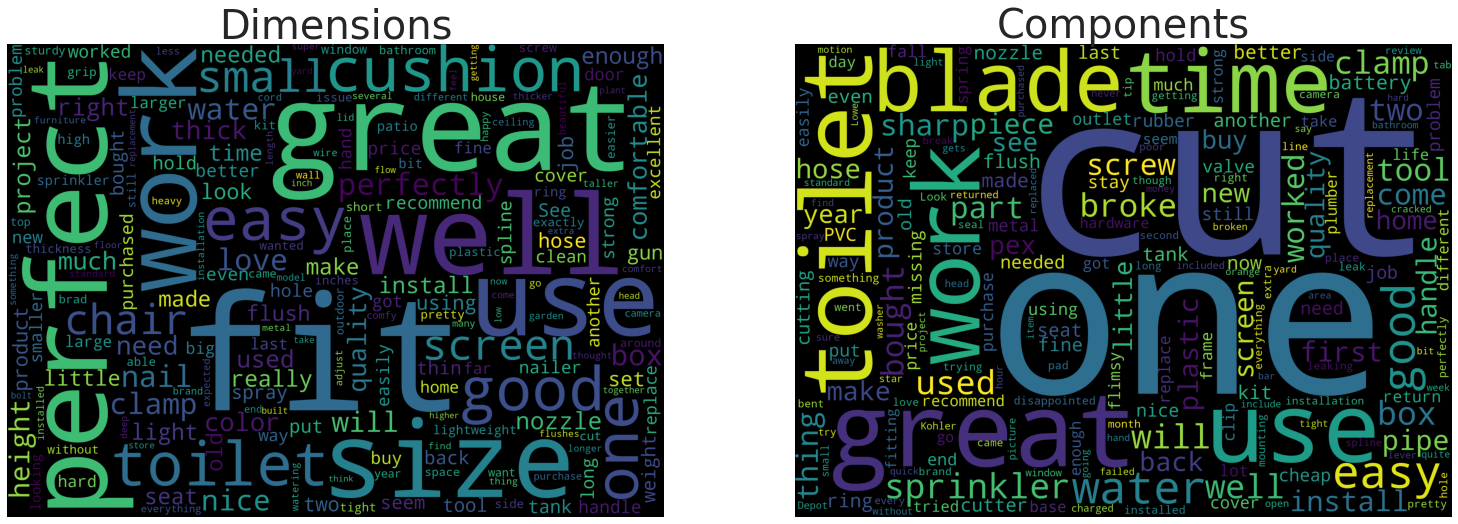

In [19]:
plt.figure(figsize=(40,25))

# toxic
subset = train[train.Components ==1]
text = subset.Review.values
cloud_toxic = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Components",fontsize=40)
plt.imshow(cloud_toxic)

# toxic
subset = train[train.Dimensions ==1]
text = subset.Review.values
cloud_toxic = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Dimensions",fontsize=40)
plt.imshow(cloud_toxic)

**Cleaning Data**

In [6]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [7]:
train['Review'] = train['Review'].str.lower()
train['Review'] = train['Review'].apply(cleanHtml)
train['Review'] = train['Review'].apply(cleanPunc)
train['Review'] = train['Review'].apply(keepAlpha)
train['Review'][0]

'for some reason everybody complains and im complaining now about my toilet that i just boughtfor some reason its not ceiling from the tank to the pedestal i cant get it sealed without cracking the toilet support design for some reason im very unhappy with his toilet never buy american standard again'

In [8]:
test['Review'] = test['Review'].str.lower()
test['Review'] = test['Review'].apply(cleanHtml)
test['Review'] = test['Review'].apply(cleanPunc)
test['Review'] = test['Review'].apply(keepAlpha)
test['Review'][0]

'made of very thin cheap metal broke on very first crimp had to rush to local hardware store spend   more on another because water was shut off in my home did not return because using case for the new one'

In [9]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

train['Review'] = train['Review'].apply(removeStopWords)
train['Review'][0]

'  reason everybody complains  im complaining    toilet    boughtfor  reason   ceiling   tank   pedestal  cant get  sealed without cracking  toilet support design   reason im  unhappy   toilet never buy american standard again'

In [10]:
test['Review'] = test['Review'].apply(removeStopWords)
test['Review'][0]

'made   thin cheap metal broke   first crimp   rush  local hardware store spend     another  water  shut    home   return  using case   new one'

In [11]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

train['Review'] = train['Review'].apply(stemming)
train['Review'][0]

'reason everybodi complain im complain toilet boughtfor reason ceil tank pedest cant get seal without crack toilet support design reason im unhappi toilet never buy american standard again'

In [12]:
test['Review'] = test['Review'].apply(stemming)
test['Review'][0]

'made thin cheap metal broke first crimp rush local hardwar store spend anoth water shut home return use case new one'

In [13]:
from sklearn.model_selection import train_test_split

train_, test_ = train_test_split(train, random_state=42, test_size=0.30, shuffle=True)

print(train_.shape)
print(test_.shape)

(4295, 14)
(1841, 14)


In [14]:
train_text = train_['Review']
test_text = test_['Review']

**TF-IDF**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)


TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [16]:
x_train = vectorizer.transform(train_text)
y_train = train_.drop(labels = ['Id', 'Review',], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test_.drop(labels = ['Id', 'Review',], axis=1)

In [18]:
print(x_test.shape, y_test.shape)

(1841, 48581) (1841, 12)


# Multi-Label Classification

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [20]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in target:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train_[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test_[category], prediction)))
    print("\n")

**Processing Components comments...**

Test accuracy is 0.9543726235741445




**Processing Delivery and Customer Support comments...**

Test accuracy is 0.9722976643128735




**Processing Design and Aesthetics comments...**

Test accuracy is 0.906572514937534




**Processing Dimensions comments...**

Test accuracy is 0.8853883758826725




**Processing Features comments...**

Test accuracy is 0.9451385116784357




**Processing Functionality comments...**

Test accuracy is 0.7914177077675176




**Processing Installation comments...**

Test accuracy is 0.9071156979902227




**Processing Material comments...**

Test accuracy is 0.9755567626290059




**Processing Price comments...**

Test accuracy is 0.9038565996740902




**Processing Quality comments...**

Test accuracy is 0.77729494839761




**Processing Usability comments...**

Test accuracy is 0.8609451385116784




**Processing Polarity comments...**

Test accuracy is 0.8109722976643129


CPU times: user 190 ms, sys: 55.8 ms, total: 246 ms
Wall time: 1.78 s


In [22]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.13416621401412276




In [23]:
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.30798479087452474




# Logistic regression with words and char n-grams



In [5]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

In [6]:
train.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [7]:
class_names = ['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']

In [10]:
train_text = train['Review']
test_text = test['Review']
all_text = pd.concat([train_text, test_text])

In [11]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  strip_accents='unicode',
                                  analyzer='word',
                                  token_pattern=r'\w{1,}',
                                  stop_words='english',
                                  ngram_range=(1, 1),
                                  max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)


In [13]:
char_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  strip_accents='unicode',
                                  analyzer='char',
                                  stop_words='english',
                                  ngram_range=(2, 6),
                                  max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  "The parameter 'stop_words' will not be used"


In [14]:
train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [18]:
scores = []
submission = pd.DataFrame.from_dict({'id': test['Id']})
for class_name in class_names:
    train_target = train[class_name]
    classifier = LogisticRegression(C=0.1, solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

CV score for class Components is 0.8781872785811196
CV score for class Delivery and Customer Support is 0.9576033030284127
CV score for class Design and Aesthetics is 0.9109387386508088
CV score for class Dimensions is 0.9204615655611197
CV score for class Features is 0.8971116495846015
CV score for class Functionality is 0.9187501916928849
CV score for class Installation is 0.9711368869962497
CV score for class Material is 0.9499149732503308
CV score for class Price is 0.9691111818304149
CV score for class Quality is 0.9269074051584324
CV score for class Usability is 0.945825832477349
CV score for class Polarity is 0.9377913124611238
Total CV score is 0.931978359939404


In [23]:
submission.drop('id',1,inplace=True)

In [26]:
submission.to_csv('logreg.csv', index=False)

Thank you